In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)

## Run code for pandas, numpy, and matplotlib

In [ ]:
wdbc = pd.read_csv("wdbc.csv",header = None) ## Assign dataset to wdbc
features = wdbc.loc[:,1:] ## Removing unnecessary first column
features.columns = ['Label'] + [str(i) for i in range(1, len(features.columns))] ## Adding label to every column using "Label" and numbers 1-30 from left to right

# features.head()
## Cleaned dataset ready for normalization

# **Normalizing Data**

In [ ]:
for column in features.columns[1:]: # for loop iterating over every numerical columnd
    min_x = min(features.loc[:, column]) # minimum value of column
    max_x = max(features.loc[:, column]) # maximum value of column
    column_name = str(column) + "_norm" # setting new columnd name of the form: "1_norm"
    features[column_name] = (features[column] - min_x) / (max_x - min_x) # normalizing data

In [ ]:
normalized_features = features.iloc[:, 31:] # obtaining only columns with normalized data
normalized_features.insert(loc = 0, column = "Label", value = features["Label"]) # appending their assigned labels
normalized_features_m = normalized_features[normalized_features["Label"] == "M"] # obtaining only rows with Label "M" from dataset of normalized values
normalized_features_b = normalized_features[normalized_features["Label"] == "B"] # obtaining only rows with Label "B" from dataset of normalized values

normalized_features.head()
# normalized_features_m.head()
# normalized_features.b_head()

,Label,1_norm,2_norm,3_norm,4_norm,5_norm,6_norm,7_norm,8_norm,9_norm,10_norm,11_norm,12_norm,13_norm,14_norm,15_norm,16_norm,17_norm,18_norm,19_norm,20_norm,21_norm,22_norm,23_norm,24_norm,25_norm,26_norm,27_norm,28_norm,29_norm,30_norm
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [ ]:
normalized_features.to_csv('data.csv') ## Exporting normalized data table into csv file

# <b>Overlapping Histograms</b>

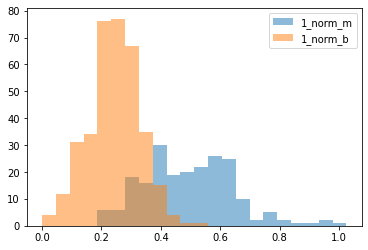

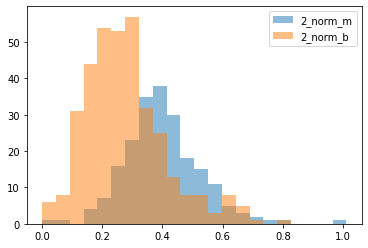

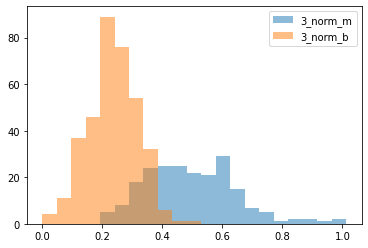

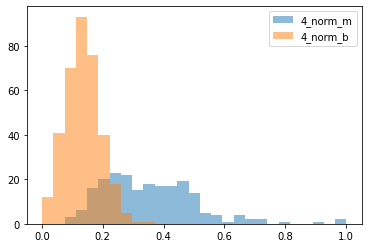

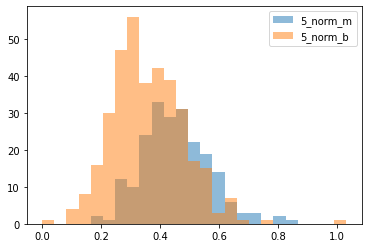

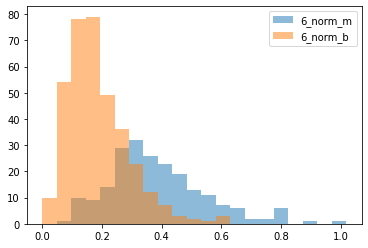

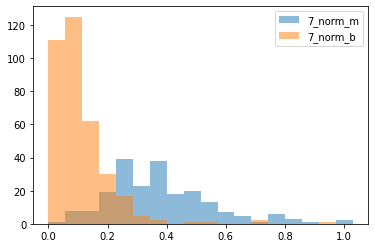

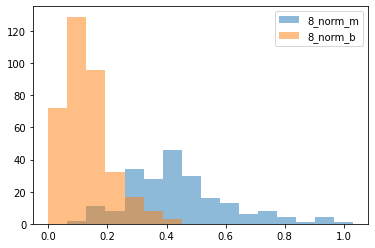

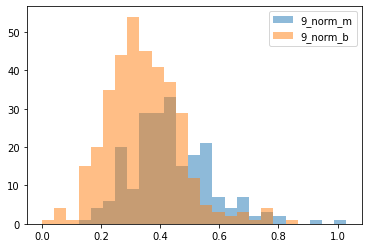

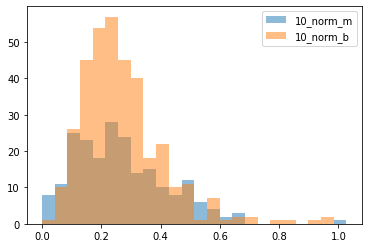

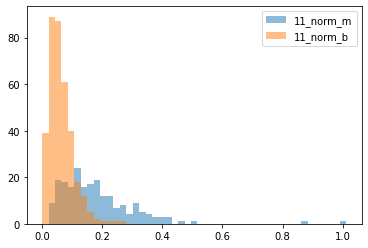

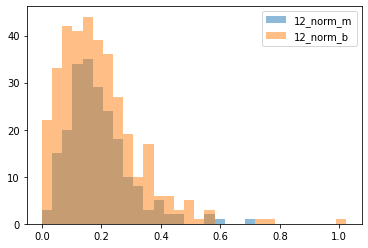

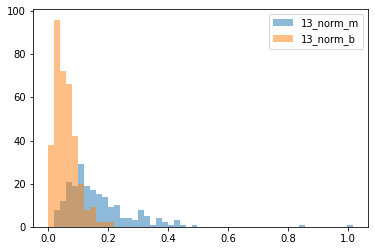

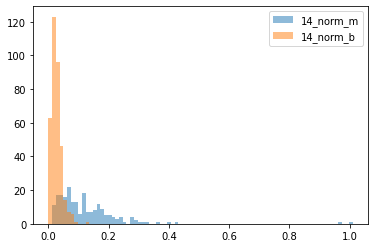

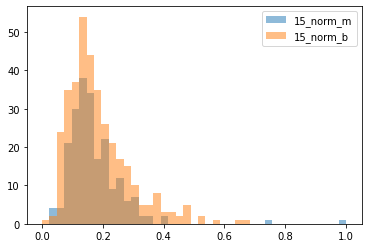

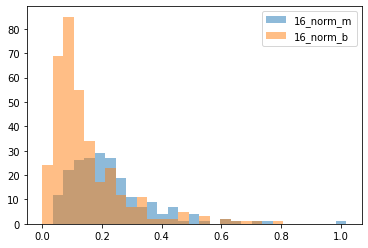

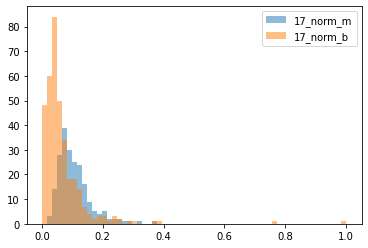

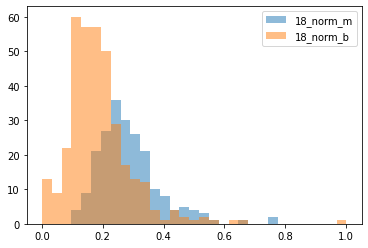

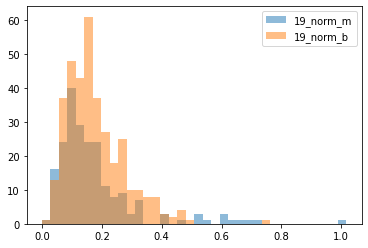

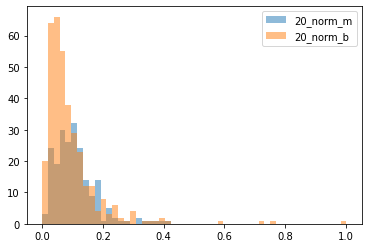

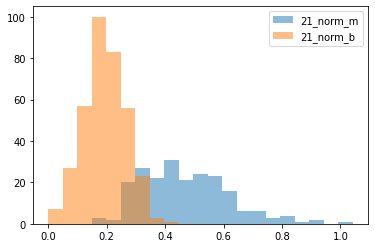

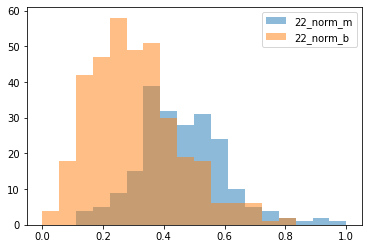

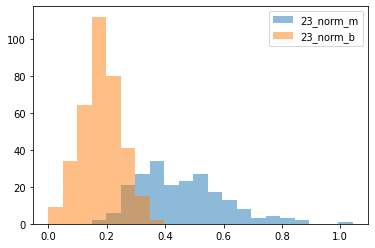

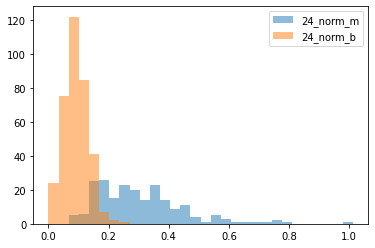

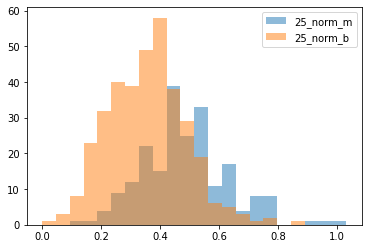

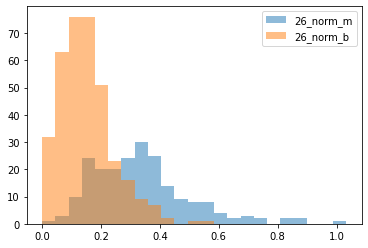

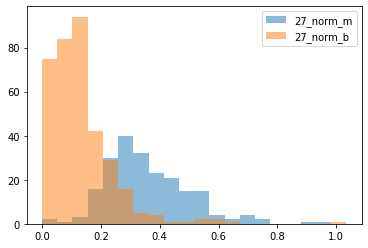

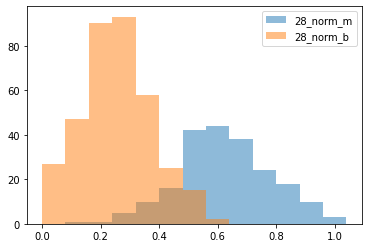

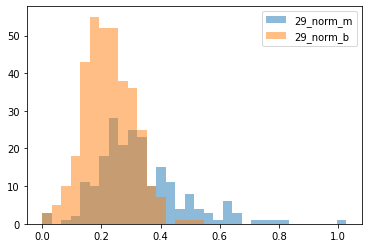

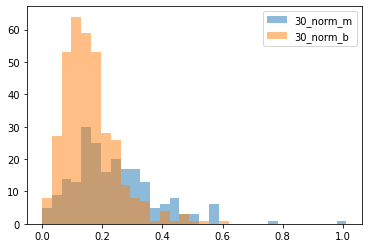

In [ ]:
def binwidth(data):
  '''Given a certain pandas Series or array of numerical data, identify the IQR, and return the bin_width given by the Freedman - Diaconis Rule'''
  q1, q3 = np.percentile(data, [25,75]) ## identify 25th and 75th quartiles
  iqr = q3 - q1 ## calculating for iqr
  n = len(data) ## identify number of rows
  bin_width = (2*iqr)/n**(1/3) ## The Freedman - Diaconis Rule is rounded by default math rounding rules
  return bin_width ## return bin_width

for column in range(1, len(normalized_features.columns)): ## looping over every numerical column from the normalized data table
  m = normalized_features_m.iloc[:, column] ## obtaining all columns that are labeled "M"
  b = normalized_features_b.iloc[:, column] ## obtaining all columns that are labeled "B"

  col = f"{column}_norm"
  bins = np.arange(min(normalized_features[col]), max(normalized_features[col]) + binwidth(normalized_features[col]), binwidth(normalized_features[col]))

  plt.hist(m, alpha = 0.5, bins=bins, label = f'{column}_norm_m') ## Plotting a histogram for dataframe m
  plt.hist(b, alpha = 0.5, bins=bins, label = f'{column}_norm_b') ## Plotting a histogram for dataframe b
  plt.legend(loc = "upper right") ## Adding necessary Legend
  plt.show() ## Show Plot

## Histogram Intersection Scores

In [ ]:
def histogram_intersection(h1, h2, bins):
    bins = np.diff(bins)
    sm = 0
    for i in range(len(bins)):
        sm += min(bins[i]*h1[i], bins[i]*h2[i])
    return sm

intersection_scores = {}

for column in range(1, len(normalized_features.columns)): ## looping over every numerical column from the normalized data table
  m = normalized_features_m.iloc[:, column] ## obtaining all columns that are labeled "M"
  b = normalized_features_b.iloc[:, column] ## obtaining all columns that are labeled "B"

  col = f"{column}_norm"
  bins = np.arange(min(normalized_features[col]), max(normalized_features[col]) + binwidth(normalized_features[col]), binwidth(normalized_features[col]))
  
  foo1, bin = np.histogram(m, bins = bins)
  foo2, _ = np.histogram(b, bins = bins)

  intersection_scores.update({column:histogram_intersection(foo1,foo2,bin)})
  
sorted(intersection_scores.items(), key=lambda kv: kv[1])

[(14, 0.9120375633520723),
 (24, 1.5517936032465125),
 (13, 2.051048060362371),
 (11, 2.2190564023827037),
 (23, 2.283073404751458),
 (17, 2.546921973585429),
 (21, 2.5806527879933068),
 (4, 2.597130471920266),
 (3, 3.039832681168688),
 (1, 3.122592144906213),
 (8, 3.1558819378906993),
 (7, 3.603282630528274),
 (20, 3.698246833531734),
 (28, 4.000631351835308),
 (27, 4.294528756903304),
 (18, 4.785326178457506),
 (15, 5.080459917298351),
 (26, 5.122743095654368),
 (29, 5.202512894084853),
 (30, 5.516691397835602),
 (6, 5.526224439746272),
 (19, 5.5664036858843104),
 (16, 5.793461934253544),
 (2, 6.938942006642412),
 (12, 7.170129083935314),
 (9, 7.21022469309746),
 (5, 7.58936642143019),
 (25, 7.638045702598648),
 (10, 8.346323865232561),
 (22, 8.837049288918584)]

# <b>Scatterplot Matrix</b>

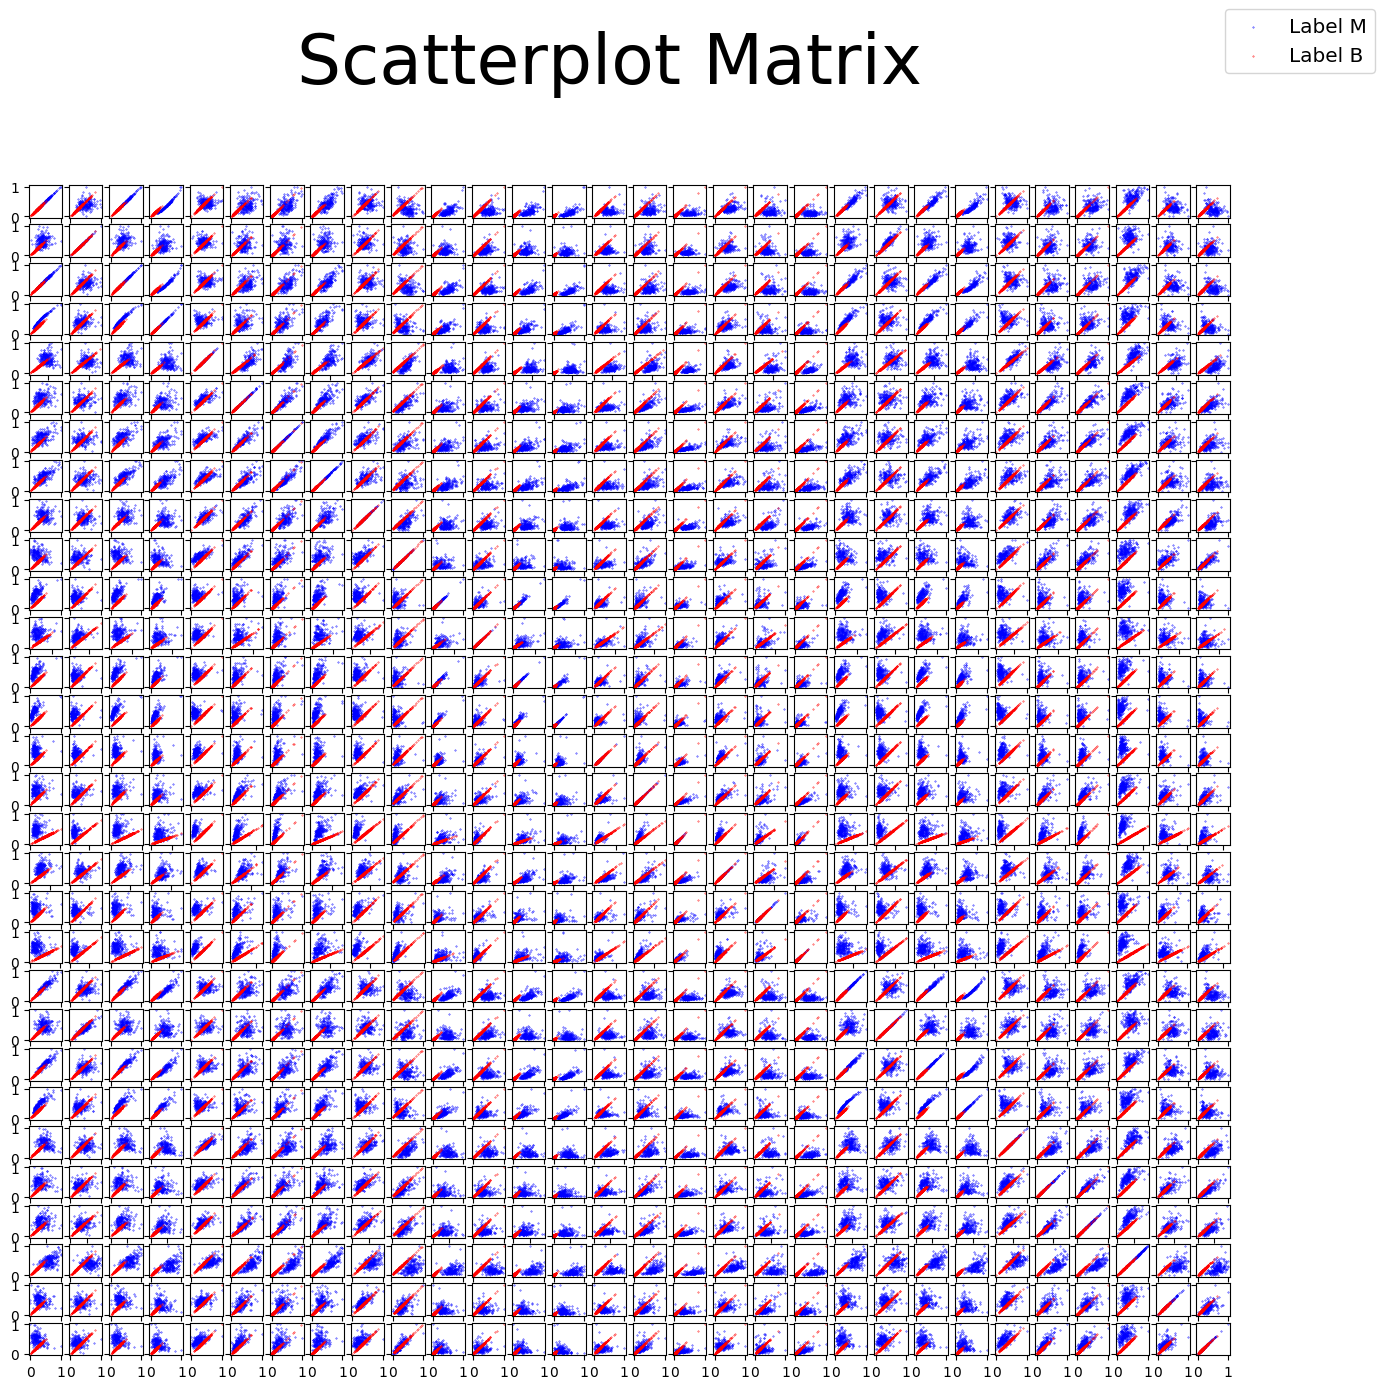

In [ ]:
fig, axs = plt.subplots(30,30) ## Identifying paramaters for the scatterplot matrix
fig.suptitle('Scatterplot Matrix', fontsize = 50) ## Setting matrix title
for x in range(30):
    for y in range(30): ## looping over every combination of features
        LabelM = normalized_features.loc[normalized_features["Label"] == "M"] ## obtaining normalized data labaled "M"
        LabelB = normalized_features.loc[normalized_features["Label"] == "B"] ## obtaining normalized data labaled "B"
        LabelM_a = LabelM.iloc[:, x+1] 
        LabelM_b = LabelM.iloc[:, y+1]
        LabelB_a = LabelB.iloc[:, y+1]
        LabelB_b = LabelB.iloc[:, y+1]
        axs[x,y].scatter(x = LabelM_a, y = LabelM_b, s = 0.1, color = "blue", label = "Label M") ## For each box create a scatterplot between M and B
        axs[x,y].scatter(x = LabelB_a, y = LabelB_b, s = 0.1, color = "red", label = "Label B")
for ax in fig.get_axes():
    ax.label_outer()
handles, labels = ax.get_legend_handles_labels() 
fig.legend(handles, labels, loc='upper right', fontsize = "x-large") ## Adding appropriate labels
fig.set_size_inches(15.5, 15.5) ## Changing UI settings
fig.set_dpi(100)
plt.savefig("image.png") ## Save plot
plt.show() ## Show plot

# <b>Parallel lines</b>

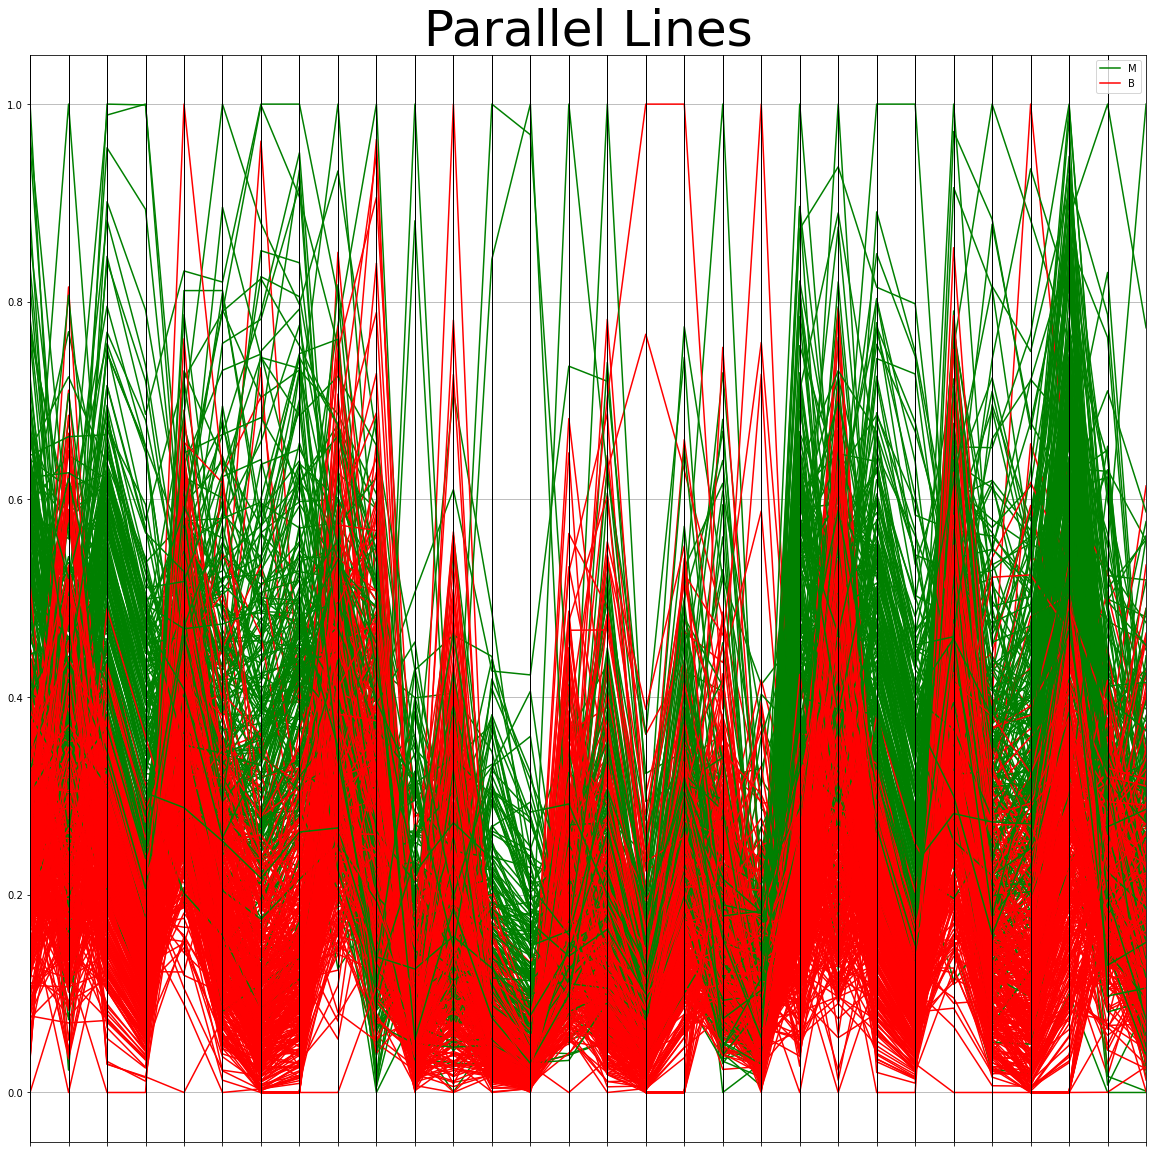

<Figure size 1440x1440 with 0 Axes>

In [ ]:
from pandas.plotting import parallel_coordinates

plt.rcParams['figure.figsize'] = [20, 20] ## Setting up graph parameters
parallel_coordinates(normalized_features.iloc[:, 0:31], 'Label', color = ["Green", "Red"]) ## Getting coordinates for every column
plt.title("Parallel Lines", fontsize = 50) ## Identifying graph title
plt.xticks(color='w')
plt.savefig("parallel.png") ## Save graph
plt.figure(figsize=(20,20)) 
plt.show() ## Show graph

## Correlation matrix

In [ ]:
xCor = normalized_features.corr() ## Pearsons's correlation value for every scatterplot entry in the matrix

In [ ]:
xCor.style.background_gradient(cmap='YlOrRd').format(precision = 2) ## Visualizing correlation on matrix with appropriate colours


,1_norm,2_norm,3_norm,4_norm,5_norm,6_norm,7_norm,8_norm,9_norm,10_norm,11_norm,12_norm,13_norm,14_norm,15_norm,16_norm,17_norm,18_norm,19_norm,20_norm,21_norm,22_norm,23_norm,24_norm,25_norm,26_norm,27_norm,28_norm,29_norm,30_norm
1_norm,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,0.68,-0.10,0.67,0.74,-0.22,0.21,0.19,0.38,-0.10,-0.04,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
2_norm,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,0.28,0.39,0.28,0.26,0.01,0.19,0.14,0.16,0.01,0.05,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
3_norm,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,0.69,-0.09,0.69,0.74,-0.20,0.25,0.23,0.41,-0.08,-0.01,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
4_norm,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,0.73,-0.07,0.73,0.80,-0.17,0.21,0.21,0.37,-0.07,-0.02,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
5_norm,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,0.30,0.07,0.30,0.25,0.33,0.32,0.25,0.38,0.20,0.28,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
6_norm,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,0.50,0.05,0.55,0.46,0.14,0.74,0.57,0.64,0.23,0.51,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
7_norm,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,0.63,0.08,0.66,0.62,0.10,0.67,0.69,0.68,0.18,0.45,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
8_norm,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,0.70,0.02,0.71,0.69,0.03,0.49,0.44,0.62,0.10,0.26,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
9_norm,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,0.30,0.13,0.31,0.22,0.19,0.42,0.34,0.39,0.45,0.33,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44
10_norm,-0.31,-0.08,-0.26,-0.28,0.58,0.57,0.34,0.17,0.48,1.00,0.00,0.16,0.04,-0.09,0.40,0.56,0.45,0.34,0.35,0.69,-0.25,-0.05,-0.21,-0.23,0.50,0.46,0.35,0.18,0.33,0.77


If the colors on the heatmap won't show, you might need to update two packages. You can run the ff. code for this:

In [ ]:
pip install ruamel-yaml
pip install jinja2 --upgrade

# **Top 5 features**

#### 1.   Feature 14

*   Smallest overlapping area in histograms - 0.91
*   Red and green lines are dispersed in parallel lines

#### 2.   Feature 17

*   Low degree of correlation with Feature 14 - 0.27
*   Relatively small overlapping area in histograms - 2.55

#### 3.   Feature 4

*   Clear distinction between red and green lines in paralel lines
*   Low degree of correlation with Feature 17 - 0.21
*   Relatively small overlapping area in histograms - 2.60

#### 4.   Feature 7

*   Clear distinction between red and green lines in paralel lines
*   Relatively low degree of correlation with Feature 14 - 0.62
*   Relatively low degree of correlation with Feature 4 - 0.69
*   Relatively low degree of correlation with Feature 17 - 0.69
*   Relatively small overlapping area in histograms - 3.60

#### 5.   Feature 20

*   Low degree of correlation with Feature 4 - (-0.02)
*   Low degree of correlation with Feature 14 - 0.13
*   Low degree of correlation with Feature 7 - 0.45
*   Relatively low degree of correlation with Feature 17 - 0.73
*   Good dispersion between red and green lines in parallel lines





## Basis for a good overlap

*  The feature with the smallest overlapping area is a better feature because it implies that the feature has a different distribution for its classes and may be a better indicator in predicting something.
*   The feature with the smallest overlap in the Malignant and Benign histograms is a better feature because it implies that it can significantly discriminate between the two. The feature has a different distribution for its classes and may be a more accurate predictor of a cyst being Benign or Malignant.



## Basis for what is considered high correlation in scatterplot matrix

*  Based on statistics solutions, there is a high degree of correlation between two variables if the correlation coefficient is between ±0.50 and ±1.
*   In this analysis, the if the correlation is between ±0.80 and ±1, then the two features are highly correlated.


## Basis based on parallel lines

*  Features that intersect the same point on the parallel lines are highly correlated and should be removed from the dataset.
*   Consider the green and red parallel lines if they condense to a single point in the parallel lines, then they are highly correlated.

